C:\Users\86131\Desktop\水色图像水质评价\images\1_1.jpg


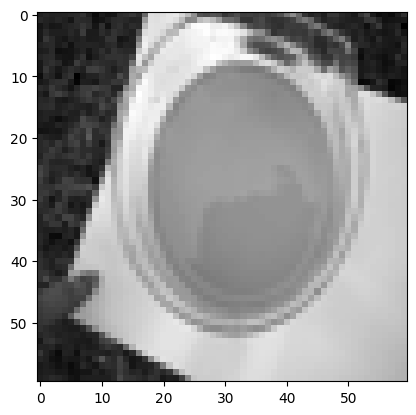

In [14]:
import os
file='C:\\Users\\86131\\Desktop\\水色图像水质评价\\images'
d=os.listdir(file)   #所有图片文件名
path=file+'\\'+d[0]  #第一个图片文件的完整路径
print(path)

from PIL import Image
import numpy as np
img = Image.open(path) #读取图片
img=img.resize((60,60)) #更改图片大小
im= img.split()        #分离RGBA通道
R=im[0]
G=im[1]
B=im[2]
img1=img.convert('L') #转化为灰图
img1=np.array(img1)   #将图像类型转换为整型
import matplotlib.pyplot as plt
plt.imshow(img1,cmap='gray') 
plt.show() #显示灰图


In [3]:
# -*- coding: utf-8 -*-
# -*- coding: utf-8 -*-
#二值化处理
from PIL import Image
import numpy as np
import os
path='C:\\Users\\86131\\Desktop\\水色图像水质评价\\images'
d=os.listdir(path)               #图片文件夹下所有图像文件名
X=np.zeros((len(d),9))           #预定义自变量，即9个颜色矩特征指标
Y=np.zeros(len(d))               #预定义因变量
for i in range(len(d)):
  img = Image.open(path+'\\'+d[i]) #读取第i张图像
  im= img.split()                  #分离RGB颜色通道
  R=np.array(im[0])/255                #R通道
  row_1=int(R.shape[0]/2)-50
  row_2=int(R.shape[0]/2)+50
  con_1=int(R.shape[1]/2)-50
  con_2=int(R.shape[1]/2)+50
  R=R[row_1:row_2,con_1:con_2]
  G=np.array(im[1])/255                #G通道
  G=G[row_1:row_2,con_1:con_2]
  B=np.array(im[2])/255                #B通道
  B=B[row_1:row_2,con_1:con_2]
  # R,G,B一阶颜色矩
  r1=np.mean(R)
  g1=np.mean(G) 
  b1=np.mean(B)   
  # R,G,B二阶颜色矩
  r2=np.std(R)   
  g2=np.std(G)
  b2=np.std(B) 
  a=np.mean(abs(R - R.mean())**3)
  b=np.mean(abs(G - G.mean())**3)
  c=np.mean(abs(B - B.mean())**3)
  #R,G,B三阶颜色矩
  r3=a**(1./3) 
  g3=b**(1./3)    
  b3=c**(1./3)  
  #赋给预定义的自变量X
  X[i,0]=r1 
  X[i,1]=g1  
  X[i,2]=b1 
  X[i,3]=r2 
  X[i,4]=g2 
  X[i,5]=b2 
  X[i,6]=r3 
  X[i,7]=g3 
  X[i,8]=b3                                                                  
  
  #从图片文件名中，截取类别，构造因变量，赋给预定义的Y
  png_name=d[i]
  I=png_name.find('_',0,len(png_name))
  Y[i]=int(png_name[:I])
print(Y)
#按80%训练，20%测试，构建训练数据集和测试数据集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

from sklearn.svm import SVC
clf = SVC(class_weight='balanced')#类标签平衡策略
clf.fit(x_train*40, y_train)
y1=clf.predict(x_test*40) #对测试数据进行预测，并获得预测结果
r=y1-y_test            #预测值与真实值相减
v=len(r[r==0])/len(y1)  #预测值与真实值相减为0，即预测准确，统计其准确率
print('预测准确率： ',v)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5.]
预测准确率：  0.9512195121951219


In [2]:
import numpy as np
import os
from PIL import Image

file='C:\\Users\\86131\\Desktop\\水色图像水质评价\\images'
d=os.listdir(file)         #文件夹所有图片文件名
X=np.zeros((len(d),100,100)) #预定义输入数据
Y=np.zeros(len(d))         #预定义输出数据
for i in range(len(d)):
  img = Image.open(file+'\\'+d[i]) #读取第i张图片
  img=img.convert('L')             #灰度化
  td=np.array(img)                 #转换为数值数组
  #获得图像中心点100*100像素的索引范围
  row_1=int(td.shape[0]/2)-50
  row_2=int(td.shape[0]/2)+50
  con_1=int(td.shape[1]/2)-50
  con_2=int(td.shape[1]/2)+50
  td=td[row_1:row_2,con_1:con_2]
  X[i]=td/255                      #归一化
  
  #构造输出数据，水质类别
  filename=d[i]
  I=filename.find('_',0,len(filename))
  if int(filename[:I])==1:
      Y[i]=0
  elif int(filename[:I])==2:
      Y[i]=1
  elif int(filename[:I])==3:
      Y[i]=2
  elif int(filename[:I])==4:
      Y[i]=3
  else:
      Y[i]=4
print(Y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=4)

from tensorflow.keras import layers, models  
#构建堆叠模型
model = models.Sequential()
#设置输入形态
model.add(layers.Reshape((100,100,1),input_shape=(100,100)))
#第一个卷积层，卷积神经元个数为32，卷积核大小为3*，默认可省
model.add(layers.Conv2D(32, (3, 3),strides=(1,1),activation='relu'))
#紧接着的第一个池化层，2*2池化，步长为2，默认可省
model.add(layers.MaxPooling2D((2, 2),strides=2))
#第二个卷积层
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#第二个池化层
model.add(layers.MaxPooling2D((2, 2)))
#第三个卷积层
model.add(layers.Conv2D(64, (3, 3), activation='relu'))     
#展平    
model.add(layers.Flatten())
#全连接层
model.add(layers.Dense(64, activation='relu'))
#输出层
model.add(layers.Dense(5, activation='softmax'))
#打印获得模型信息
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200)
model.evaluate(x_test,  y_test,verbose=2)
yy=model.predict(x_test) #获得预测结果概率矩阵
y1=np.argmax(yy,axis=1)  #获得最终预测结果，取概率最大的类标签
r=y1-y_test                #预测结果与实际结果相减
rv=len(r[r==0])/len(r)   #计算预测准确率
print('预测准确率： ',rv)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4.]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 100, 100, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        320       
                             

In [1]:
import numpy as np
import os
from PIL import Image

file='C:\\Users\\86131\\Desktop\\水色图像水质评价\\images'
d=os.listdir(file)                 #文件夹所有图片文件名
X=np.zeros((len(d),100,100,3))       #预定义输入数据
Y=np.zeros(len(d))                 #预定义输出数据
for i in range(len(d)):   
  img = Image.open(file+'\\'+d[i])  #读取第i张图片， #img有R,G,B三个通道
  im= img.split()                  #分离RGB颜色通道
  R=np.array(im[0])              #R通道
  row_1=int(R.shape[0]/2)-50
  row_2=int(R.shape[0]/2)+50
  con_1=int(R.shape[1]/2)-50
  con_2=int(R.shape[1]/2)+50
  R=R[row_1:row_2,con_1:con_2]
  G=np.array(im[1])               #G通道
  G=G[row_1:row_2,con_1:con_2]
  B=np.array(im[2])               #B通道
  B=B[row_1:row_2,con_1:con_2]  
  #取R,G,B通道即可,并归一化
  X[i,:,:,0]=R/255
  X[i,:,:,1]=G/255
  X[i,:,:,2]=B/255
  
  #构造输出数据，水质类别
  s=d[i]
  I=s.find('_',0,len(s))
  if int(s[:I])==1:
      Y[i]=0
  elif int(s[:I])==2:
      Y[i]=1
  elif int(s[:I])==3:
      Y[i]=2
  elif int(s[:I])==4:
      Y[i]=3
  else:
      Y[i]=4
print(Y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=4)

#import tensorflow
from tensorflow.keras import layers, models  
model = models.Sequential()
#第一个卷积层，卷积神经元个数为32，卷积核大小为3×，默认可省
model.add(layers.Conv2D(32, (3, 3),strides=(1,1),activation='relu',
                        input_shape=(100, 100,3)))
#紧接着的第一个池化层，2×2池化，步长为2，默认可缺省
model.add(layers.MaxPooling2D((2, 2),strides=2))
#第二个卷积层
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#第二个池化层
model.add(layers.MaxPooling2D((2, 2)))
#第三个卷积层
model.add(layers.Conv2D(64, (3, 3), activation='relu'))     
#展平    
model.add(layers.Flatten())
#全连接层
model.add(layers.Dense(64, activation='relu'))
#输出层
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=500)
model.evaluate(x_test,  y_test, verbose=2)

yy=model.predict(x_test) #获得预测结果概率矩阵
y1=np.argmax(yy,axis=1)  #获得最终预测结果，取概率最大的类标签
r=y1-y_test                #预测结果与实际结果相减
rv=len(r[r==0])/len(r)   #计算预测准确率
print('预测准确率： ',rv)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4.]




Epoch 1/500


6/6 [==============================] - 2s 93ms/step - loss: 1.4930 - accuracy: 0.3025
Epoch 2/500
6/6 [==============================] - 1s 83ms/step - loss: 1.2480 - accuracy: 0.4877
Epoch 3/500
6/6 [==============================] - 1s 83ms/step - loss: 1.1511 - accuracy: 0.5247
Epoch 4/500
6/6 [==============================] - 1s 82ms/step - loss: 0.9736 - 

KeyboardInterrupt: 